In [219]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

In [220]:
data = pd.read_csv('Portuguese.csv')

In [221]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [222]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [223]:
object_list = []
for i in range(len(data.dtypes)):

    if data.dtypes[i] == 'object':
        object_list.append(data.columns[i])
object_list      

['school',
 'sex',
 'address',
 'famsize',
 'Pstatus',
 'Mjob',
 'Fjob',
 'reason',
 'guardian',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic']

In [224]:
data[object_list] = data[object_list].apply(lambda x: pd.factorize(x)[0])
data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,0,18,0,0,0,4,4,0,0,...,4,3,4,1,1,3,4,0,11,11
1,0,0,17,0,0,1,1,1,0,1,...,5,3,3,1,1,3,2,9,11,11
2,0,0,15,0,1,1,1,1,0,1,...,4,3,2,2,3,3,6,12,13,12
3,0,0,15,0,0,1,4,2,1,2,...,3,2,2,1,1,5,0,14,14,14
4,0,0,16,0,0,1,3,3,2,1,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,1,0,19,1,0,1,2,3,3,1,...,5,4,2,1,2,5,4,10,11,10
645,1,0,18,0,1,1,3,1,4,2,...,4,3,4,1,1,1,4,15,15,16
646,1,0,18,0,0,1,1,1,2,1,...,1,1,1,1,1,5,6,11,12,9
647,1,1,17,0,1,1,3,1,3,2,...,2,4,5,3,4,2,6,10,10,10


In [225]:
data.shape

(649, 33)

In [226]:
data.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [227]:
X = data.drop(['G1', 'G2', 'G3'], axis = 1)
X

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
0,0,0,18,0,0,0,4,4,0,0,...,0,0,0,4,3,4,1,1,3,4
1,0,0,17,0,0,1,1,1,0,1,...,0,1,0,5,3,3,1,1,3,2
2,0,0,15,0,1,1,1,1,0,1,...,0,1,0,4,3,2,2,3,3,6
3,0,0,15,0,0,1,4,2,1,2,...,0,1,1,3,2,2,1,1,5,0
4,0,0,16,0,0,1,3,3,2,1,...,0,0,0,4,3,2,1,2,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,1,0,19,1,0,1,2,3,3,1,...,0,1,0,5,4,2,1,2,5,4
645,1,0,18,0,1,1,3,1,4,2,...,0,1,0,4,3,4,1,1,1,4
646,1,0,18,0,0,1,1,1,2,1,...,0,0,0,1,1,1,1,1,5,6
647,1,1,17,0,1,1,3,1,3,2,...,0,1,0,2,4,5,3,4,2,6


In [228]:
y = data['G3']
y = y.reset_index(drop = True)
y[y[:]<= 10] = 0
y[y[:]>= 10] = 1
y

0      1
1      1
2      1
3      1
4      1
      ..
644    0
645    1
646    0
647    0
648    1
Name: G3, Length: 649, dtype: int64

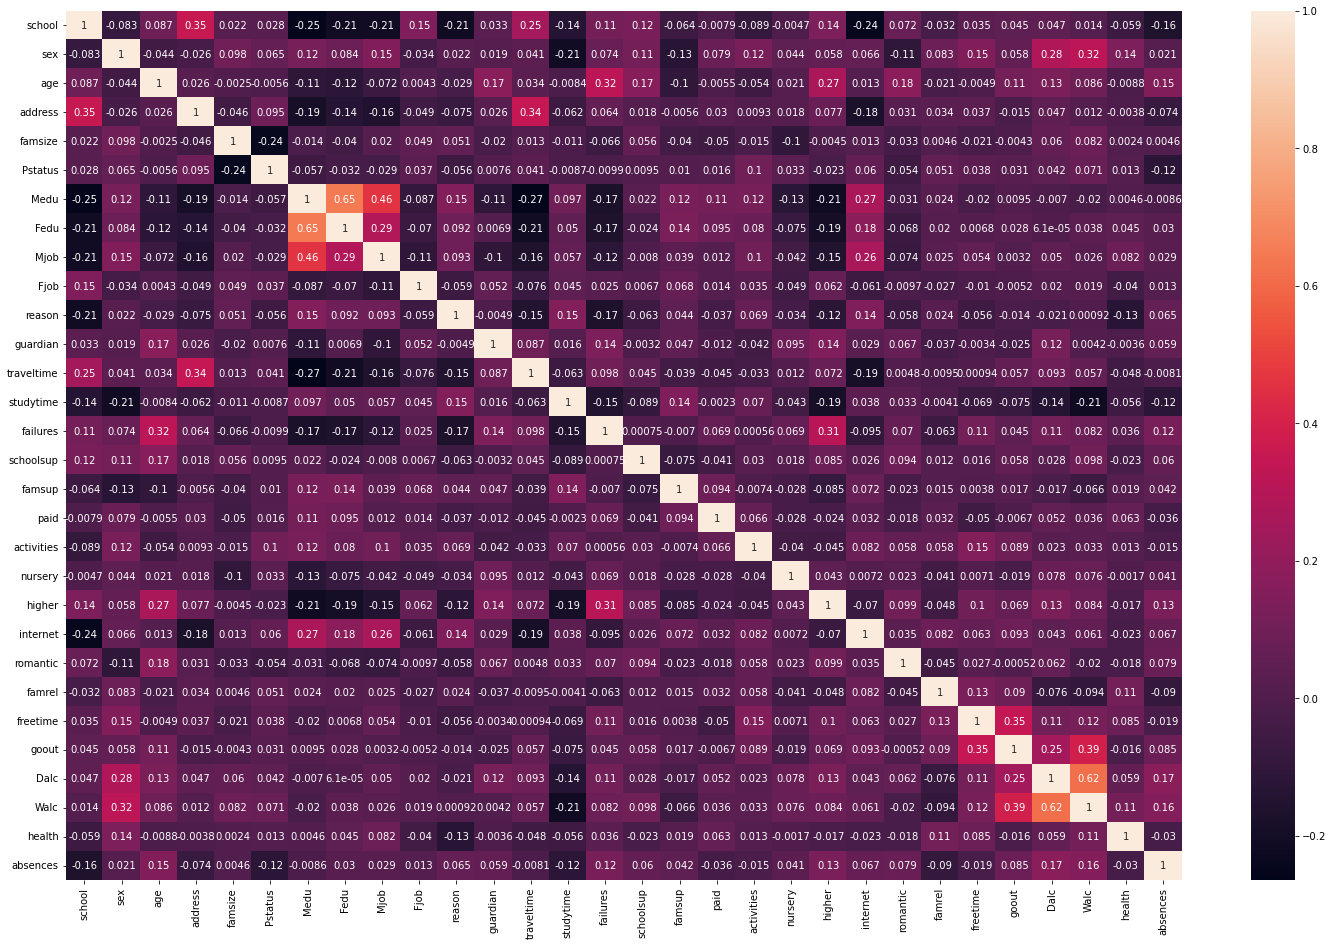

In [229]:
plt.figure(figsize=(25, 16))
sns.heatmap(X.corr(), annot=True)
plt.show()

In [230]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

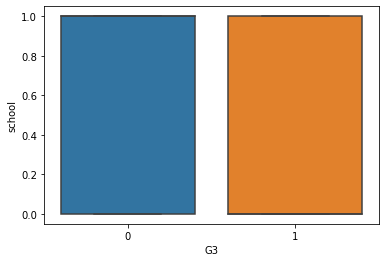

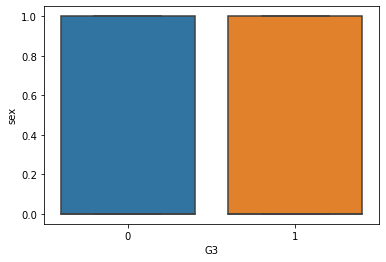

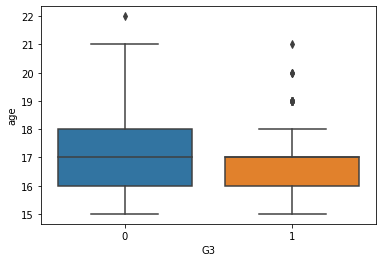

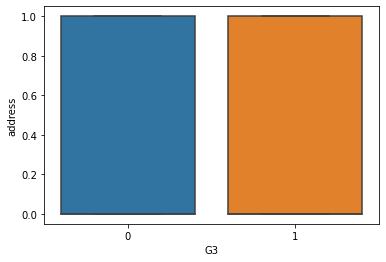

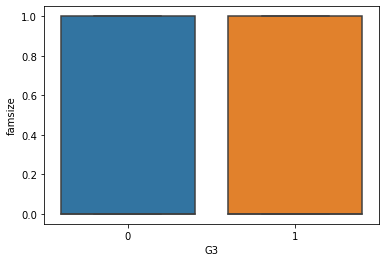

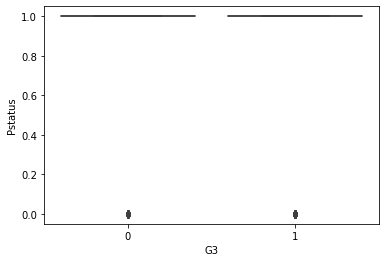

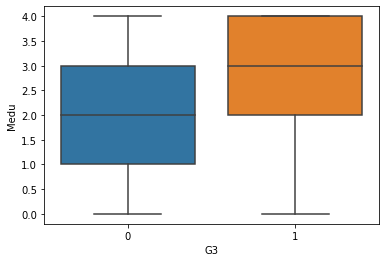

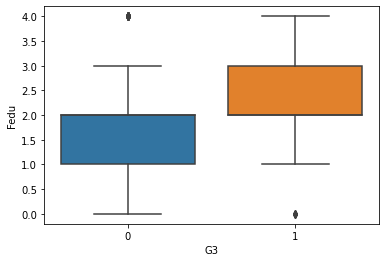

In [231]:
feature_names = X_train.columns[:8]
for i in range(len(feature_names)):
    figure = plt.figure()
    ax = sns.boxplot(x=y, y=feature_names[i], data=data)

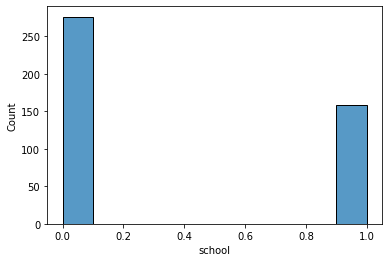

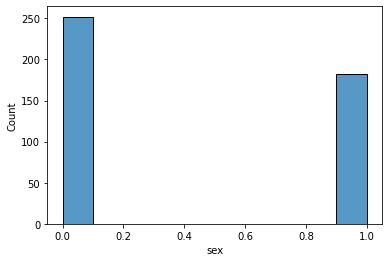

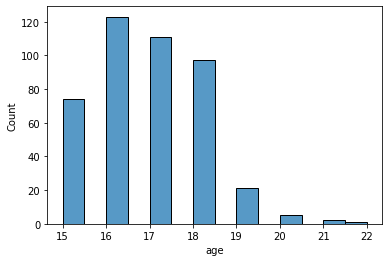

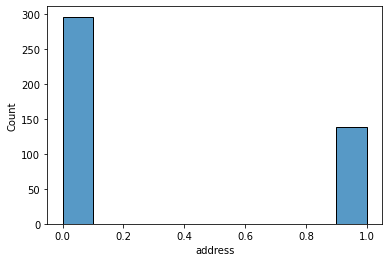

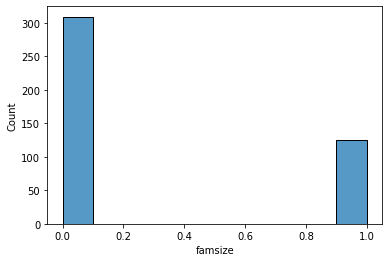

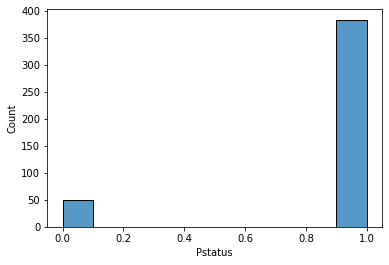

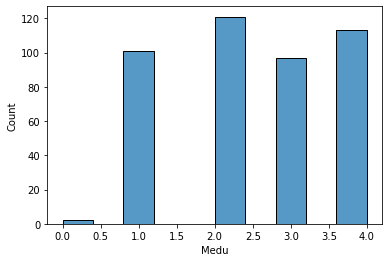

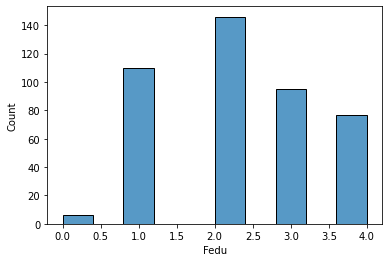

In [232]:
for i in X_train.columns[:8]:
    figure = plt.figure()
    ax = sns.histplot(X_train[i])

### kNN

In [233]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [234]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [235]:
scaled_X_train = scaler.transform(X_train) 
scaled_X_test = scaler.transform(X_test) 

In [236]:
knn = KNeighborsClassifier(n_neighbors=5)

In [237]:
knn.fit(scaled_X_train, y_train)

KNeighborsClassifier()

In [238]:
y_pred = knn.predict(scaled_X_test)

In [239]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[ 20  39]
 [ 10 146]]
              precision    recall  f1-score   support

           0       0.67      0.34      0.45        59
           1       0.79      0.94      0.86       156

    accuracy                           0.77       215
   macro avg       0.73      0.64      0.65       215
weighted avg       0.76      0.77      0.74       215



In [240]:
print(accuracy_score(y_test, y_pred))

0.772093023255814


In [241]:
error_rate = []

for i in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(scaled_X_train,y_train)
    pred_i = knn.predict(scaled_X_test)
    error_rate.append(np.mean(pred_i != y_test))
    

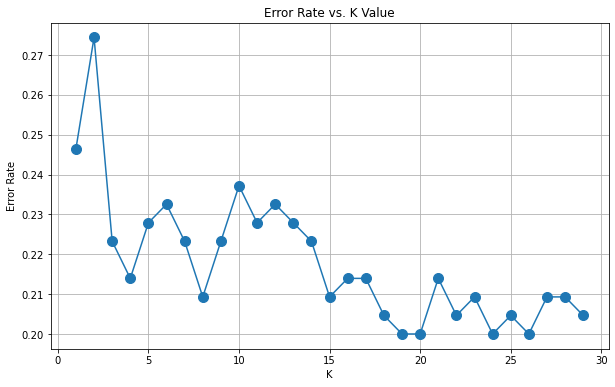

In [242]:
plt.figure(figsize=(10,6))
plt.plot(range(1,30), error_rate, marker='o', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.grid()

In [243]:
knn = KNeighborsClassifier(n_neighbors=8)

In [244]:
knn.fit(scaled_X_train, y_train)

KNeighborsClassifier(n_neighbors=8)

In [245]:
y_pred = knn.predict(scaled_X_test)

In [246]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[ 21  38]
 [  7 149]]
              precision    recall  f1-score   support

           0       0.75      0.36      0.48        59
           1       0.80      0.96      0.87       156

    accuracy                           0.79       215
   macro avg       0.77      0.66      0.68       215
weighted avg       0.78      0.79      0.76       215



In [247]:
print(accuracy_score(y_test, y_pred))

0.7906976744186046


### Decision Tree

In [248]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [249]:
tree = DecisionTreeClassifier(criterion='gini', max_depth = 5)

In [250]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [251]:
y_pred = tree.predict(X_test)

In [252]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 28  31]
 [ 20 136]]
              precision    recall  f1-score   support

           0       0.58      0.47      0.52        59
           1       0.81      0.87      0.84       156

    accuracy                           0.76       215
   macro avg       0.70      0.67      0.68       215
weighted avg       0.75      0.76      0.75       215



In [253]:
print(accuracy_score(y_test, y_pred))

0.7627906976744186


### Model Evaluation

In [254]:
from sklearn.model_selection import GridSearchCV
params = {'max_depth':list(range(1, 15))}
gr_s = GridSearchCV(tree, params, scoring='roc_auc', cv=5)
gr_s.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(max_depth=5),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14]},
             scoring='roc_auc')

In [255]:
gr_s.best_estimator_ 

DecisionTreeClassifier(max_depth=3)

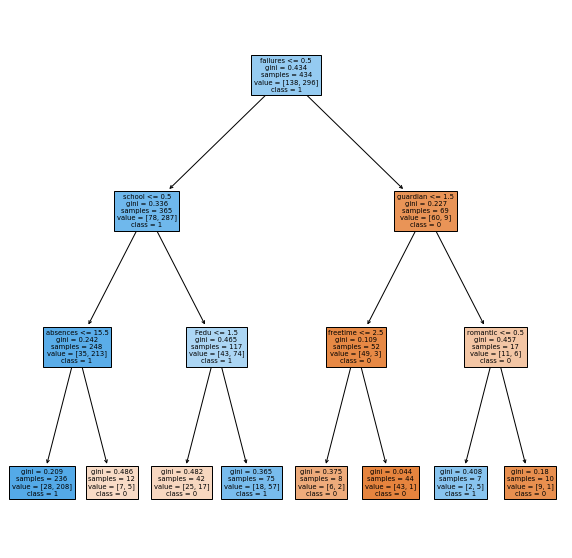

In [256]:
tree = DecisionTreeClassifier(max_depth=3)
tree.fit(X_train, y_train)
plt.figure(figsize = (10, 10))
plot_tree(tree, feature_names = X_train.columns, 
          class_names = ['0','1'], filled = True)
plt.show()

In [257]:
y_pred = tree.predict(X_test)

In [258]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 30  29]
 [ 22 134]]
              precision    recall  f1-score   support

           0       0.58      0.51      0.54        59
           1       0.82      0.86      0.84       156

    accuracy                           0.76       215
   macro avg       0.70      0.68      0.69       215
weighted avg       0.75      0.76      0.76       215



In [259]:
print(accuracy_score(y_test, y_pred))

0.7627906976744186


### SVM

In [260]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [261]:
model = SVC(C=1.0, gamma = 1.0, kernel = 'rbf', probability=False)

In [262]:
model.fit(scaled_X_train,y_train)

SVC(gamma=1.0)

In [263]:
y_pred = model.predict(scaled_X_test)

In [264]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[  0  59]
 [  0 156]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        59
           1       0.73      1.00      0.84       156

    accuracy                           0.73       215
   macro avg       0.36      0.50      0.42       215
weighted avg       0.53      0.73      0.61       215



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [265]:
print(accuracy_score(y_test, y_pred))

0.7255813953488373


In [266]:
param_grid = {'C': [0.1, 1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 

In [267]:
grid = GridSearchCV(SVC(), param_grid, refit=True)

In [268]:
grid.fit(scaled_X_train,y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']})

In [269]:
grid.best_params_

{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}

In [270]:
grid.best_estimator_

SVC(C=10, gamma=0.01)

In [271]:
grid_predictions = grid.predict(scaled_X_test)

In [272]:
print(confusion_matrix(y_test,grid_predictions))
print(classification_report(y_test,grid_predictions))

[[ 28  31]
 [ 16 140]]
              precision    recall  f1-score   support

           0       0.64      0.47      0.54        59
           1       0.82      0.90      0.86       156

    accuracy                           0.78       215
   macro avg       0.73      0.69      0.70       215
weighted avg       0.77      0.78      0.77       215



In [273]:
print(accuracy_score(y_test, grid_predictions))

0.7813953488372093


### Random Forest

In [274]:
from sklearn.ensemble import RandomForestClassifier

In [275]:
RFC = RandomForestClassifier()

In [276]:
for i in range(1, 25):
    forest = RandomForestClassifier(criterion = 'entropy',n_estimators = i)
    forest.fit(X_train,y_train)
    y_pred = forest.predict(X_test)
    print('Number of tree: ', i)
    print('Accuracy:', accuracy_score(y_test, y_pred) )

Number of tree:  1
Accuracy: 0.6511627906976745
Number of tree:  2
Accuracy: 0.6372093023255814
Number of tree:  3
Accuracy: 0.7069767441860465
Number of tree:  4
Accuracy: 0.6930232558139535
Number of tree:  5
Accuracy: 0.7348837209302326
Number of tree:  6
Accuracy: 0.7488372093023256
Number of tree:  7
Accuracy: 0.7813953488372093
Number of tree:  8
Accuracy: 0.7767441860465116
Number of tree:  9
Accuracy: 0.7441860465116279
Number of tree:  10
Accuracy: 0.7627906976744186
Number of tree:  11
Accuracy: 0.786046511627907
Number of tree:  12
Accuracy: 0.8093023255813954
Number of tree:  13
Accuracy: 0.7767441860465116
Number of tree:  14
Accuracy: 0.7813953488372093
Number of tree:  15
Accuracy: 0.7906976744186046
Number of tree:  16
Accuracy: 0.8
Number of tree:  17
Accuracy: 0.7534883720930232
Number of tree:  18
Accuracy: 0.772093023255814
Number of tree:  19
Accuracy: 0.7813953488372093
Number of tree:  20
Accuracy: 0.7906976744186046
Number of tree:  21
Accuracy: 0.77209302325581

In [277]:
forest = RandomForestClassifier(criterion = 'entropy',n_estimators = 13)
forest.fit(X_train,y_train)
y_pred = forest.predict(X_test)

In [278]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 31  28]
 [ 15 141]]
              precision    recall  f1-score   support

           0       0.67      0.53      0.59        59
           1       0.83      0.90      0.87       156

    accuracy                           0.80       215
   macro avg       0.75      0.71      0.73       215
weighted avg       0.79      0.80      0.79       215



In [279]:
print(accuracy_score(y_test, y_pred))

0.8


### AdaBoost

In [280]:
from sklearn.ensemble import AdaBoostClassifier

In [281]:
ABC = AdaBoostClassifier(n_estimators = 30)

In [282]:
ABC.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=30)

In [283]:
y_pred = ABC.predict(X_test)

In [284]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 28  31]
 [ 13 143]]
              precision    recall  f1-score   support

           0       0.68      0.47      0.56        59
           1       0.82      0.92      0.87       156

    accuracy                           0.80       215
   macro avg       0.75      0.70      0.71       215
weighted avg       0.78      0.80      0.78       215



In [285]:
print(accuracy_score(y_test, y_pred))

0.7953488372093023
